In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Data_Science\Python\Datasets\Car daa\car-data-analysis.csv")

In [3]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(8), object(7)
memory usage: 50.8+ KB


In [5]:
df.isnull().sum()

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64

In [6]:
df.columns


Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'Invoice',
       'EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway',
       'Weight', 'Wheelbase', 'Length'],
      dtype='object')

In [7]:
df[df['Make'].isnull()]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- we need to remove that doller sign from **MSRP** and **Invoice**

In [18]:
for i in ['MSRP','Invoice']:
    df[i]=df[i].str.replace('$','')
    df[i]=df[i].str.replace(',','').astype(float)


In [22]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


- Q. 1) Find all Null Values in the dataset. If there is any null value in any column, then fill it with the mean of that column.

In [26]:
categorical_columns=[feature for feature in df.columns if df[feature].dtype == 'O']
categorical_columns

['Make', 'Model', 'Type', 'Origin', 'DriveTrain']

In [28]:
numerical_columns=[feature for feature in df.columns if df[feature].dtype != 'O']
numerical_columns

['MSRP',
 'Invoice',
 'EngineSize',
 'Cylinders',
 'Horsepower',
 'MPG_City',
 'MPG_Highway',
 'Weight',
 'Wheelbase',
 'Length']

In [46]:
for feature in numerical_columns:
    df[feature].fillna(np.mean(df[feature]),inplace=True)

In [62]:
for i in categorical_columns:
    mode=df[i].value_counts().index[0]
    df[i].fillna(mode,inplace=True)

In [66]:
df.iloc[[30,39,161,173],:]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
30,Toyota,G35 4dr,Sedan,Asia,Front,32774.85514,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.36215
39,Toyota,G35 4dr,Sedan,Asia,Front,32774.85514,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.36215
161,Toyota,G35 4dr,Sedan,Asia,Front,32774.85514,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.36215
173,Toyota,G35 4dr,Sedan,Asia,Front,32774.85514,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.36215


In [68]:
df['Make'].value_counts()

Make
Toyota           32
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Audi             19
Nissan           17
Honda            17
Chrysler         15
Volkswagen       15
Mitsubishi       13
Dodge            13
Hyundai          12
Jaguar           12
Volvo            12
Kia              11
Mazda            11
Lexus            11
Pontiac          11
Subaru           11
Lincoln           9
Mercury           9
Buick             9
Saturn            8
Infiniti          8
GMC               8
Cadillac          8
Suzuki            8
Porsche           7
Saab              7
Acura             7
Oldsmobile        3
Jeep              3
Land Rover        3
MINI              2
Scion             2
Isuzu             2
Hummer            1
Name: count, dtype: int64

- Q. 3)Show all the records where Origin is Asia or Europe.


In [70]:
df[(df['Origin']=='Asia') | (df['Origin']=='Europe')]

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,21.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,20.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,19.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,22.0,29.0,2822.0,101.0,180.0


- Q. 4)Remove all the records (rows) where Weight is above 4000.

In [86]:
df.drop(df[df['Weight']>4000].index,inplace=True)

In [88]:
df.shape

(329, 15)

- Q. 5)Increase all the values of 'MPG_City' column by 3.

In [102]:
df['MPG_City']=df['MPG_City'].apply(lambda x:x+3)

In [104]:
df

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200.0,27.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200.0,25.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270.0,23.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225.0,21.0,24.0,3880.0,115.0,197.0
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100.0,41100.0,3.5,6.0,225.0,21.0,24.0,3893.0,115.0,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,40565.0,38203.0,2.4,5.0,197.0,24.0,28.0,3450.0,105.0,186.0
428,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,42565.0,40083.0,2.3,5.0,242.0,23.0,26.0,3450.0,105.0,186.0
429,Volvo,S80 T6 4dr,Sedan,Europe,Front,45210.0,42573.0,2.9,6.0,268.0,22.0,26.0,3653.0,110.0,190.0
430,Volvo,V40,Wagon,Europe,Front,26135.0,24641.0,1.9,4.0,170.0,25.0,29.0,2822.0,101.0,180.0


# Visualisation

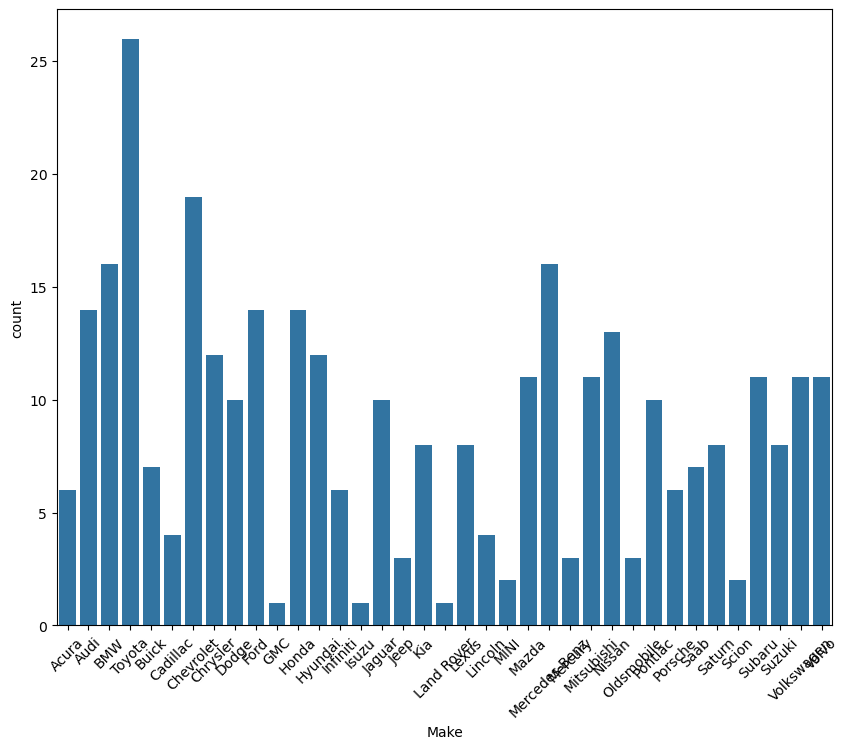

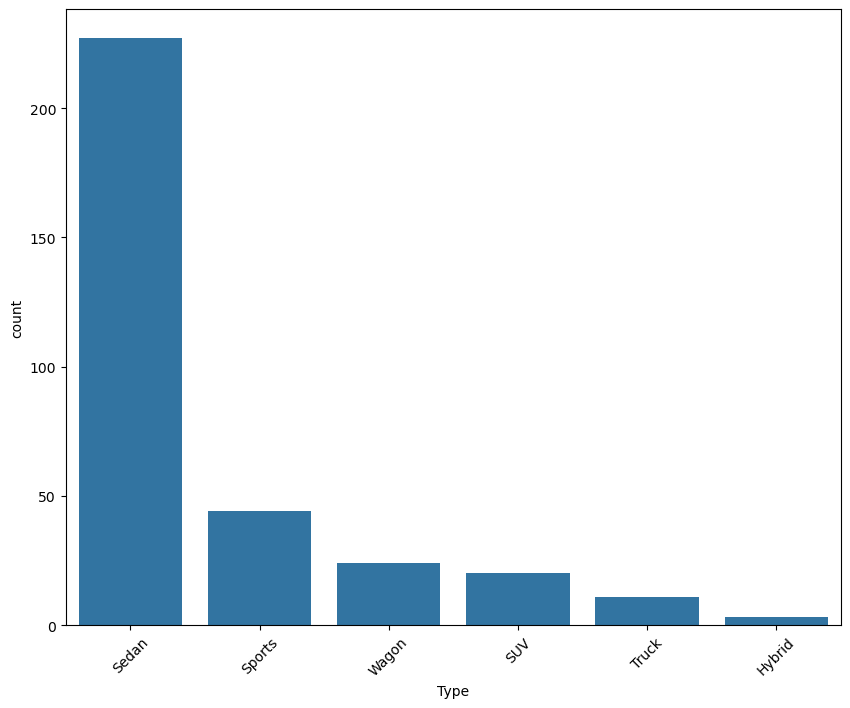

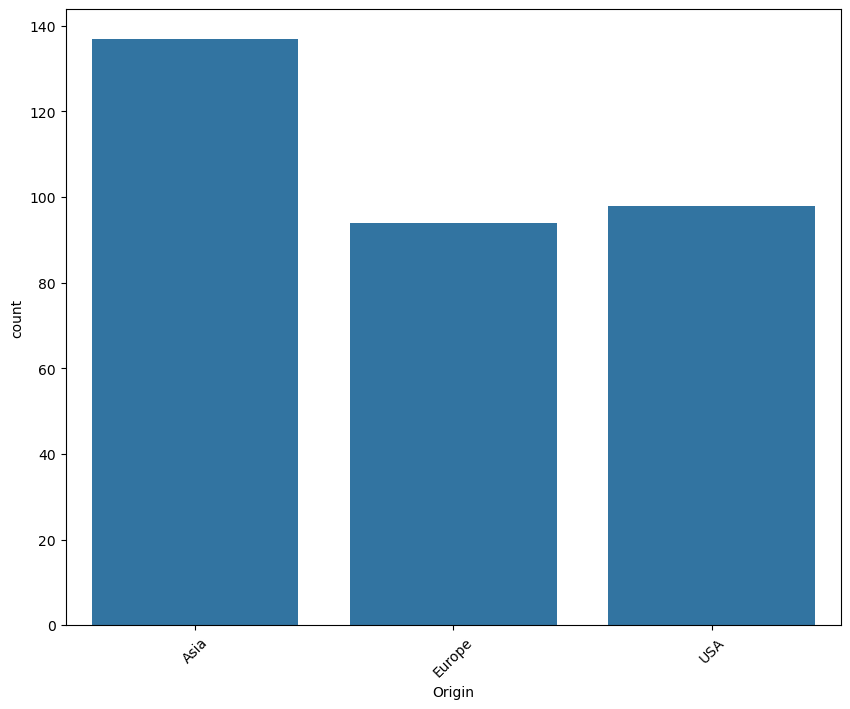

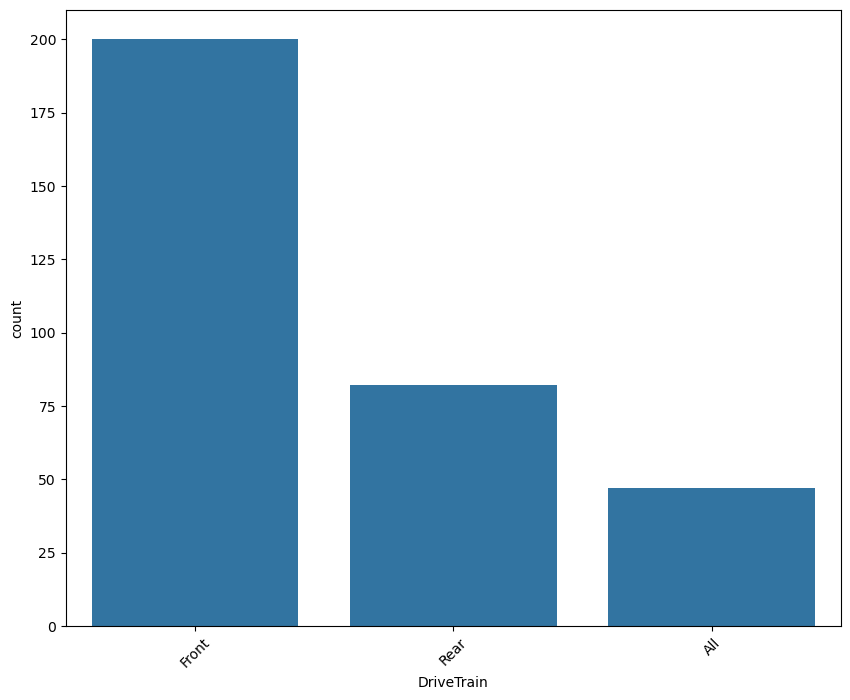

In [121]:
for i in categorical_columns:
    if i!='Model':
        plt.figure(figsize=(10,8))
        sns.countplot(data=df,x=i)
        plt.xticks(rotation=45)

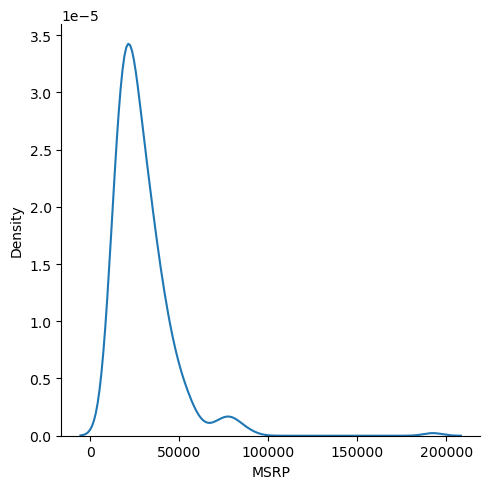

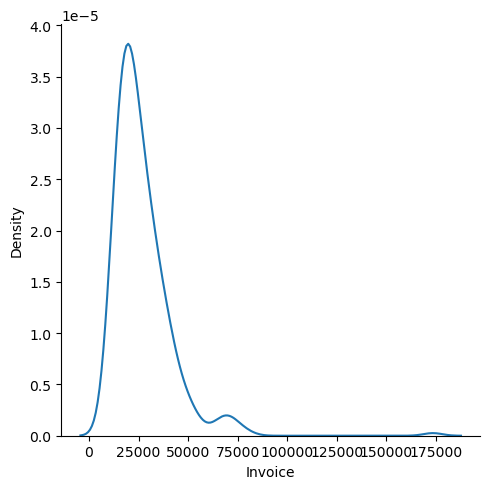

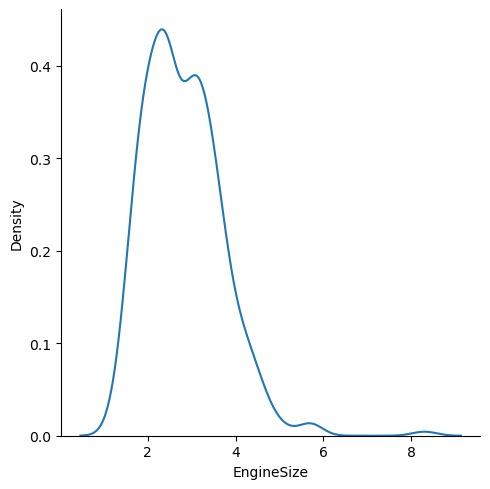

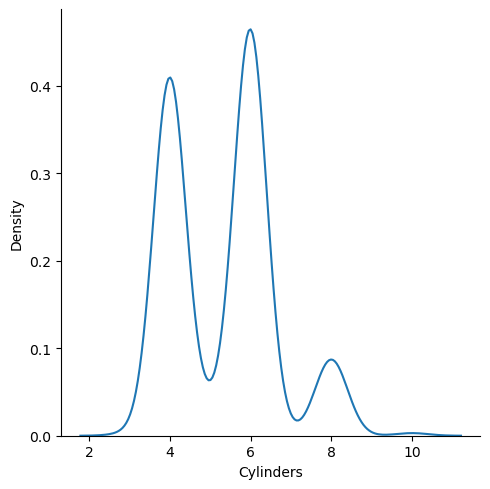

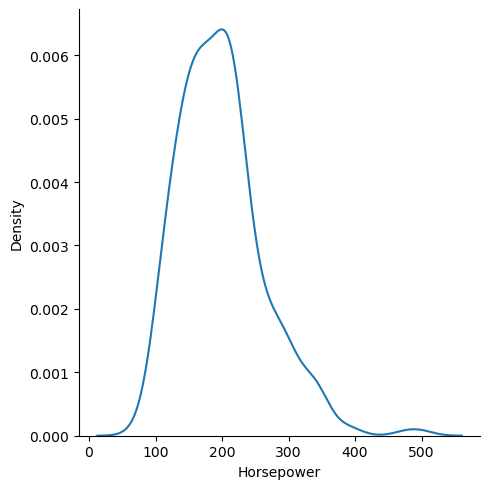

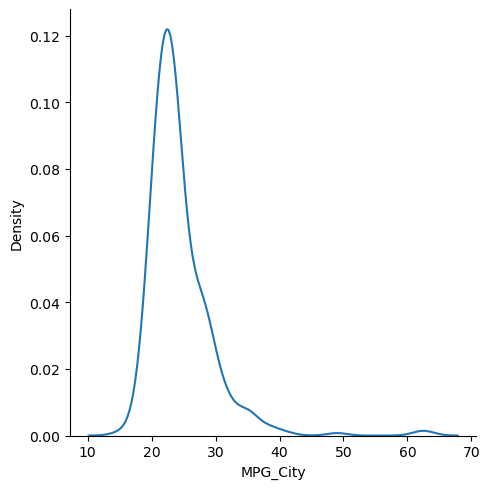

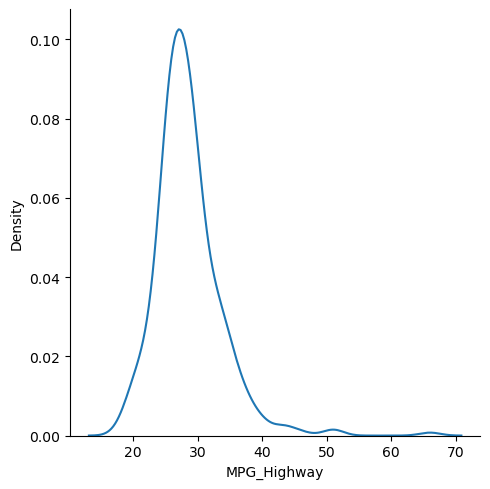

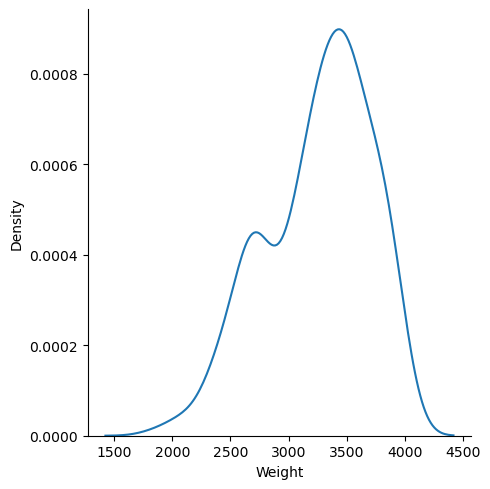

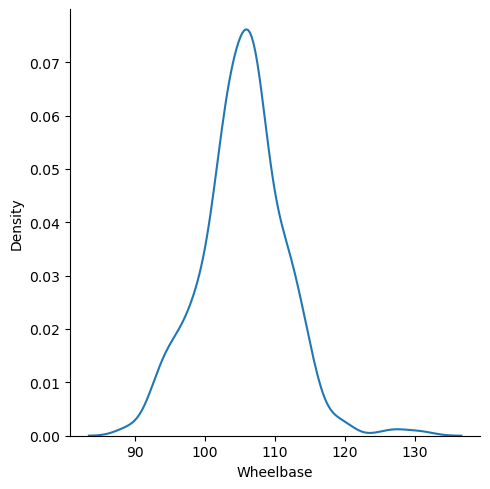

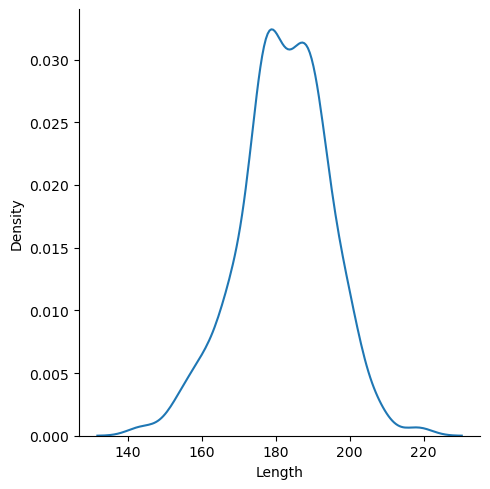

In [125]:
for i in numerical_columns:
    sns.displot(data=df,x=i,kind='kde')